In [1]:
import torch
from torch import nn
from d2l import torch as d2l

def vgg_block(num_convs,in_channels,out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
        in_channels=out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

conv_arch=((1,64),(1,128),(2,256),(2,512),(2,512))

def vgg(conv_arch):
    conv_blks=[]
    in_channels=1
    for (num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels=out_channels
    return nn.Sequential(
        *conv_blks,nn.Flatten(),
        nn.Linear(out_channels*7*7,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,10)
    )

net=vgg(conv_arch)
X=torch.randn(size=(1,1,224,224))
for blk in net:
    X=blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [4]:
from torchsummary import summary
summary(net,(1,224,224),batch_size=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 64, 224, 224]             640
              ReLU-2          [1, 64, 224, 224]               0
         MaxPool2d-3          [1, 64, 112, 112]               0
            Conv2d-4         [1, 128, 112, 112]          73,856
              ReLU-5         [1, 128, 112, 112]               0
         MaxPool2d-6           [1, 128, 56, 56]               0
            Conv2d-7           [1, 256, 56, 56]         295,168
              ReLU-8           [1, 256, 56, 56]               0
            Conv2d-9           [1, 256, 56, 56]         590,080
             ReLU-10           [1, 256, 56, 56]               0
        MaxPool2d-11           [1, 256, 28, 28]               0
           Conv2d-12           [1, 512, 28, 28]       1,180,160
             ReLU-13           [1, 512, 28, 28]               0
           Conv2d-14           [1, 512,

loss 0.173, train acc 0.936, test acc 0.923
1214.4 examples/sec on cuda:0


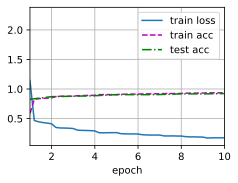

In [3]:
# 构建一个通道数较少的网络,足够用于训练Fashion-MNIST数据集
ratio=4
small_conv_arch=[(pair[0],pair[1]//ratio) for pair in conv_arch]
net=vgg(small_conv_arch)
lr,num_epochs,batch_size=0.05,10,128
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

Exercises

减小原始图像分辨率观察对结果的影响

loss 0.225, train acc 0.916, test acc 0.903
5329.7 examples/sec on cuda:0


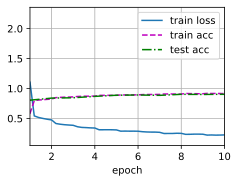

In [5]:
def vgg_smaller_input(conv_arch):
    conv_blks=[]
    in_channels=1
    for (num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels=out_channels
    return nn.Sequential(
        *conv_blks,nn.Flatten(),
        nn.Linear(out_channels*3*3,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.5),
        nn.Linear(4096,10)
    )

net=vgg_smaller_input(small_conv_arch)
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size,resize=96)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

# 结论:训练时间缩短，精度降低